# **Project Name : ✨Fashion MNIST Clothing Classification✨**

AUTHOR : **Jamshed Butt** from **Data Science**

# **Introduction :**

**Fashion MNIST Clothing Classification**

The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

# **Import Libraries**



In [73]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# **Load Dataset**

In [74]:
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()

In [75]:
print("train_image : ",train_image.shape)
print("train_label : ",train_label.shape)
print("test_image : ",test_image.shape)
print("test_label : ",test_label.shape)

train_image :  (60000, 28, 28)
train_label :  (60000,)
test_image :  (10000, 28, 28)
test_label :  (10000,)


In [76]:
train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [77]:
train_label[0]

9

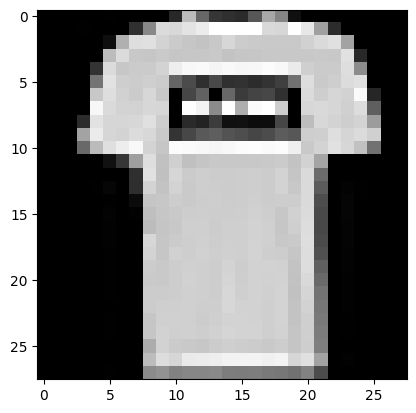

In [78]:
sample = 1
image = train_image[sample]
# plot the sample
plt.imshow(image, cmap='gray')
plt.show()

In [79]:
train_image = train_image.reshape((60000,28*28))
train_image = train_image.astype("float32")/255

test_image = test_image.reshape((10000,28*28))
test_image = test_image.astype("float32")/255

In [80]:
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)

# **Building Model**

In [81]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(32, activation="relu", input_shape=(28*28,)),
                                    tf.keras.layers.Dense(64, activation="relu"),
                                    tf.keras.layers.Dense(64, activation="relu"),
                                    tf.keras.layers.Dense(10,activation="softmax")])

In [82]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["acc"])

In [83]:
val_image = train_image[:10000]
train_image = train_image[10000:]
val_label = train_label[:10000]
train_label = train_label[10000:]

In [84]:
print("train_image : ",train_image.shape)
print("train_label : ",train_label.shape)
print("val_image : ",val_image.shape)
print("val_label : ",val_label.shape)

train_image :  (50000, 784)
train_label :  (50000, 10)
val_image :  (10000, 784)
val_label :  (10000, 10)


# **Train Model**

In [85]:
history = model.fit(train_image, train_label, epochs=20, batch_size=128, validation_data=(val_image,val_label))

Epoch 1/20
391/391 [==============================] - 2s 5ms/step - loss: 0.6884 - acc: 0.7571 - val_loss: 0.4954 - val_acc: 0.8254
Epoch 2/20
391/391 [==============================] - 2s 4ms/step - loss: 0.4547 - acc: 0.8387 - val_loss: 0.4158 - val_acc: 0.8479
Epoch 3/20
391/391 [==============================] - 2s 5ms/step - loss: 0.4069 - acc: 0.8523 - val_loss: 0.4095 - val_acc: 0.8466
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.3777 - acc: 0.8637 - val_loss: 0.3802 - val_acc: 0.8605
Epoch 5/20
391/391 [==============================] - 1s 4ms/step - loss: 0.3586 - acc: 0.8701 - val_loss: 0.3560 - val_acc: 0.8677
Epoch 6/20
391/391 [==============================] - 1s 4ms/step - loss: 0.3447 - acc: 0.8739 - val_loss: 0.3793 - val_acc: 0.8591
Epoch 7/20
391/391 [==============================] - 2s 4ms/step - loss: 0.3320 - acc: 0.8790 - val_loss: 0.3484 - val_acc: 0.8754
Epoch 8/20
391/391 [==============================] - 2s 4ms/step - loss: 0.

In [86]:
model.evaluate(test_image,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3758 - acc: 0.8744


[0.3758319616317749, 0.8744000196456909]

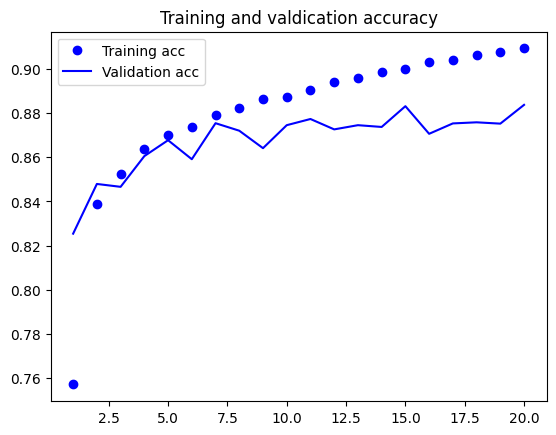

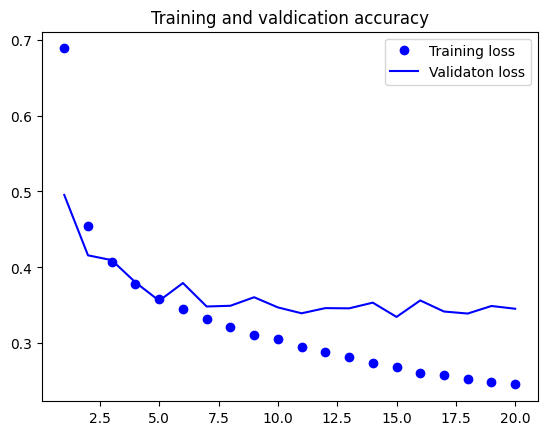

In [87]:
acc = history.history["acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
val_acc = history.history["val_acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and valdication accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validaton loss")
plt.title("Training and valdication accuracy")
plt.legend()

plt.show()

In [88]:
y_pred = model.predict(test_image)

313/313 [==============================] - 1s 2ms/step


In [89]:
y_pred

array([[1.7593375e-07, 3.3657564e-08, 2.1651768e-08, ..., 1.0814143e-03,
        9.7980113e-09, 9.9873561e-01],
       [2.3802189e-05, 1.7052333e-09, 9.9823523e-01, ..., 1.9616399e-14,
        2.1079334e-08, 3.7831585e-10],
       [1.9348936e-13, 9.9999994e-01, 1.5810607e-14, ..., 3.3417039e-32,
        5.7061309e-18, 2.1537935e-23],
       ...,
       [3.4384991e-04, 1.7601531e-07, 2.2230535e-04, ..., 1.0482573e-11,
        9.9799198e-01, 3.9013900e-10],
       [3.9511802e-10, 9.9999982e-01, 1.1490056e-11, ..., 3.3398362e-21,
        8.5129937e-15, 6.3639892e-13],
       [1.1135045e-07, 6.4757116e-10, 3.6269631e-07, ..., 9.0067006e-06,
        1.1408083e-06, 1.5926756e-06]], dtype=float32)

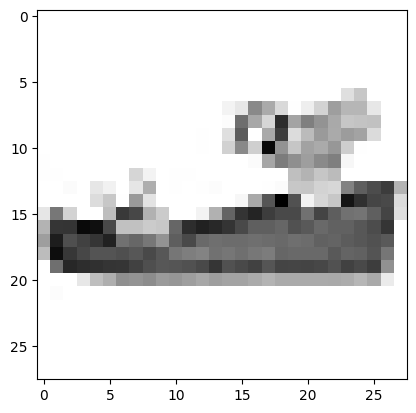

5


In [90]:
plt.imshow(train_image[11].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
print(np.argmax(y_pred[11]))

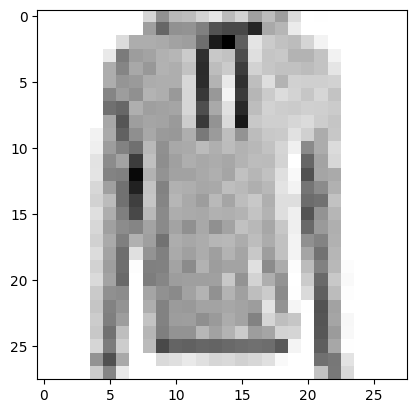

4


In [91]:
plt.imshow(train_image[6].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
print(np.argmax(y_pred[6]))

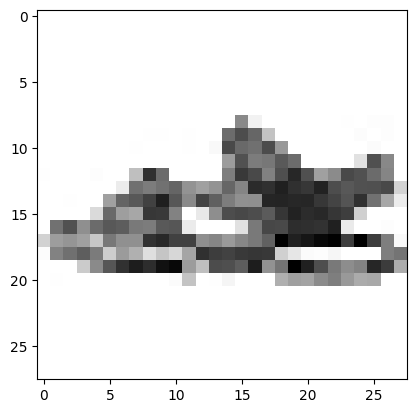

5


In [92]:
plt.imshow(train_image[8].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
print(np.argmax(y_pred[8]))

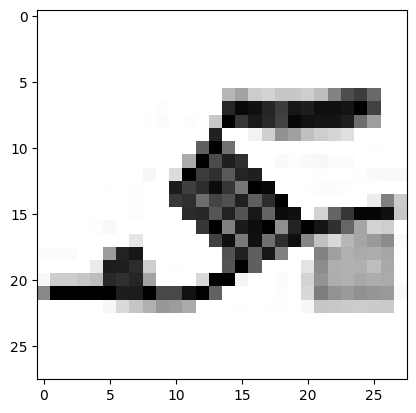

4


In [93]:
plt.imshow(train_image[10].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
print(np.argmax(y_pred[10]))

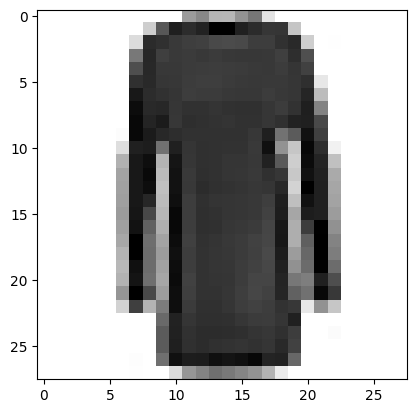

3


In [94]:
plt.imshow(train_image[13].reshape((28,28)), cmap=plt.cm.binary)
plt.show()
print(np.argmax(y_pred[13]))